### 情绪因子的选股能力
1. 回测时段为2013年4月30日至2016年5月31日；
2. 样本空间为全体A股，剔除ST股和上市未满60日的新股；
3. 组合每月月初调仓，交易费率设为双边千分之三；
4. 调仓时，涨停、停牌不买入，跌停、停牌不卖出。

### 筛选给定时间段的数据
0. 剔除ST股和上市未满60日的新股
1. 切分每月数据
2. 计算该只股票的情绪因子
3. 设置交易费率

In [13]:
"""筛选给定时间段数据"""
import feather
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utility as u_q
reload(u_q)

<module 'utility' from 'utility.pyc'>

In [23]:
# path = './SH600000.feather'
path = '/Volumes/Seagate Backup Plus Drive/workspace/1m data/1/SH600000.feather'
df = feather.read_dataframe(path)

print df.shape
df.head(33600)

(468480, 9)


,date,open,high,low,close,preClose,preClose2,amount,vwap
0,2010-01-04 09:31:00,21.83,21.87,21.83,21.84,21.69,21.69,29328174.0,21.843743
1,2010-01-04 09:32:00,21.85,21.85,21.80,21.80,21.84,21.69,15051979.0,21.831390
2,2010-01-04 09:33:00,21.80,21.80,21.70,21.75,21.80,21.69,8075582.0,21.755339
3,2010-01-04 09:34:00,21.73,21.75,21.72,21.75,21.75,21.69,6140101.0,21.741874
4,2010-01-04 09:35:00,21.74,21.76,21.73,21.76,21.75,21.69,6250674.0,21.756610
5,2010-01-04 09:36:00,21.78,21.79,21.76,21.79,21.76,21.69,4390640.0,21.778968
6,2010-01-04 09:37:00,21.79,21.79,21.74,21.74,21.79,21.69,11072675.0,21.753782
7,2010-01-04 09:38:00,21.74,21.74,21.69,21.70,21.74,21.69,6169787.0,21.709237
8,2010-01-04 09:39:00,21.70,21.70,21.66,21.68,21.70,21.69,6096695.0,21.680992
9,2010-01-04 09:40:00,21.65,21.66,21.61,21.65,21.68,21.69,7531232.0,21.647692


In [28]:
ss=df['close'].pct_change()*100
print ss.head(10)
ss[np.isnan(ss)]=0

0         NaN
1   -0.183150
2   -0.229358
3    0.000000
4    0.045977
5    0.137868
6   -0.229463
7   -0.183993
8   -0.092166
9   -0.138376
Name: close, dtype: float64


In [29]:
ss

0         0.000000
1        -0.183150
2        -0.229358
3         0.000000
4         0.045977
5         0.137868
6        -0.229463
7        -0.183993
8        -0.092166
9        -0.138376
10        0.184758
11        0.046104
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16       -0.184332
17        0.138504
18       -0.046104
19       -0.092251
20       -0.323176
21       -0.185271
22       -0.139211
23        0.185874
24       -0.092764
25       -0.046425
26        0.139340
27        0.092764
28       -0.092678
29       -0.139147
            ...   
468450   -0.076628
468451    0.000000
468452    0.076687
468453   -0.076628
468454    0.000000
468455   -0.076687
468456    0.000000
468457    0.000000
468458    0.076746
468459    0.000000
468460   -0.076687
468461    0.000000
468462    0.000000
468463    0.076746
468464    0.000000
468465   -0.153374
468466    0.000000
468467   -0.076805
468468   -0.153728
468469    0.000000
468470    0.076982
468471    0.

In [288]:
start_date = "2013-04-30 09:30"
end_date = "2016-05-31 15:00"
valid_data = u_q.extract_valid_data_range(df, start_date, end_date)
print valid_data.shape

(168620, 9)


In [304]:
valid_data_dateids = valid_data.set_index('date')
valid_data_dateids["2014-09-01":"2014-09-10"]

,open,high,low,close,preClose,preClose2,amount,vwap
date,,,,,,,,
2014-09-01 09:31:00,4.64,4.65,4.64,4.65,4.65,4.65,547441.0,4.643581
2014-09-01 09:32:00,4.65,4.65,4.64,4.65,4.65,4.65,123946.0,4.642172
2014-09-01 09:33:00,4.64,4.65,4.64,4.64,4.65,4.65,925446.0,4.640572
2014-09-01 09:34:00,4.65,4.65,4.63,4.63,4.64,4.65,827275.0,4.634594
2014-09-01 09:35:00,4.63,4.64,4.63,4.63,4.63,4.65,883517.0,4.630592
2014-09-01 09:36:00,4.63,4.64,4.62,4.63,4.63,4.65,951446.0,4.629908
2014-09-01 09:37:00,4.62,4.64,4.62,4.64,4.63,4.65,481722.0,4.627493
2014-09-01 09:38:00,4.63,4.63,4.62,4.63,4.64,4.65,636646.0,4.629951
2014-09-01 09:39:00,4.63,4.65,4.63,4.63,4.63,4.65,923802.0,4.635164


In [290]:
"""generate year-month index from 2013-04 to 2016-06"""
begin_year = 2013
end_year = 2016
begin_mon = 4
end_mon = 6
mon_num = (end_year - begin_year)*12+(end_mon-begin_mon)
year_month_set = []

for month_ in xrange(mon_num):
    year_step = (month_+begin_mon)//12 
    year_step = year_step if (month_+begin_mon)%12!=0 else year_step-1
    month_curr = (month_+begin_mon)%12 if (month_+begin_mon)%12!=0 else 12
    year_month_str = '{:d}-{:02d}'.format(begin_year+year_step, month_curr)
    year_month_set.append(year_month_str)
print len(year_month_set)
print year_month_set
    

38
['2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05']


In [192]:
test_data = u_q.extract_valid_data_range(valid_data, '2013-05', '2013-06')


In [310]:
"""split the data by their month"""
_data_mon_group = []
"""faster than Method(extract_valid_data_range)"""
valid_data_dateids = valid_data.set_index('date')
for ids, _begin in enumerate(year_month_set):
    if ids < len(year_month_set)-1:
        _data_mon_group.append(valid_data_dateids[_begin:year_month_set[ids+1]])
    else:
        _data_mon_group.append(valid_data_dateids[_begin:])
print "data(month) before filtering:", len(_data_mon_group)

# _data_mon_group = []
# valid_data_dateids = valid_data.set_index('date')
# for ids, _begin in enumerate(year_month_set):
#     if ids < len(year_month_set)-1:
#         data_mon_group.append(u_q.extract_valid_data_range(valid_data, 
#                               _begin, year_month_set[ids+1]))
#     else:
#         data_mon_group.append(u_q.extract_valid_data_range(valid_data, start_date = _begin))

print "data(month) before filtering:", len(_data_mon_group)
# filter empty element
del_ids = []
for _ids,_ in enumerate(_data_mon_group):
    if _.empty:
#         print _ids
        print _
        _data_mon_group.pop(_ids)
print "data(months) after filtering:", len(_data_mon_group)
df_empty = pd.DataFrame({"open":"", "high":"", "low":"", "close":"", "preClose":"", "preClose2":"", "amount":"", "vwap":""}, index=[])
print df_empty

data(month) before filtering: 38
data(month) before filtering: 38
Empty DataFrame
Columns: [open, high, low, close, preClose, preClose2, amount, vwap]
Index: []
Empty DataFrame
Columns: [open, high, low, close, preClose, preClose2, amount, vwap]
Index: []
data (months) after filtering: 36
Empty DataFrame
Columns: [amount, close, high, low, open, preClose, preClose2, vwap]
Index: []


In [305]:
a = _data_mon_group[0]
b = pd.to_datetime(a.index)
c = set(b.day)
print b.day.unique()[-10:]
print b.year.unique()[0]
# dir(b)
# pd.groupby(b, by=b.index.month )
# a.groupby(pd.TimeGrouper(freq='D'))

Int64Index([20, 21, 22, 23, 24, 27, 28, 29, 30, 31], dtype='int64', name=u'date')
2013


In [283]:
mon_data = _data_mon_group[0]
"""extract last 10 days in each month"""
def extract_last_ndays_month(mon_data, offset_days = 10):
    mon_date_ids = pd.to_datetime(mon_data.index)
    last_days = mon_date_ids.day.unique()[-offset_days:]
    print "last {:d} days:".format(offset_days), last_days
    year = mon_date_ids.year.unique()[0]
    month = mon_date_ids.month.unique()[0]
    start_date = "{:d}-{:02d}-{:02d}".format(year, month, last_days[0])
    end_date = "{:d}-{:02d}-{:02d}".format(year, month, last_days[-1])
    print "date: ", (start_date, end_date)
    return (start_date, end_date)


In [284]:
"""filter 10 days data in each month"""
data_mon_group = []
for mon_data in _data_mon_group:
    date_start_end = extract_last_ndays_month(mon_data, offset_days = 10)
    data_mon_group.append(mon_data[date_start_end[0]:date_start_end[1]])
print len(data_mon_group)
data_mon_group[0].head(data_mon_group[0].shape[0])

last 10 days: Int64Index([20, 21, 22, 23, 24, 27, 28, 29, 30, 31], dtype='int64', name=u'date')
date:  ('2013-05-20', '2013-05-31')
last 10 days: Int64Index([17, 18, 19, 20, 21, 24, 25, 26, 27, 28], dtype='int64', name=u'date')
date:  ('2013-06-17', '2013-06-28')
last 10 days: Int64Index([18, 19, 22, 23, 24, 25, 26, 29, 30, 31], dtype='int64', name=u'date')
date:  ('2013-07-18', '2013-07-31')
last 10 days: Int64Index([19, 20, 21, 22, 23, 26, 27, 28, 29, 30], dtype='int64', name=u'date')
date:  ('2013-08-19', '2013-08-30')
last 10 days: Int64Index([13, 16, 17, 18, 23, 24, 25, 26, 27, 30], dtype='int64', name=u'date')
date:  ('2013-09-13', '2013-09-30')
last 10 days: Int64Index([18, 21, 22, 23, 24, 25, 28, 29, 30, 31], dtype='int64', name=u'date')
date:  ('2013-10-18', '2013-10-31')
last 10 days: Int64Index([18, 19, 20, 21, 22, 25, 26, 27, 28, 29], dtype='int64', name=u'date')
date:  ('2013-11-18', '2013-11-29')
last 10 days: Int64Index([18, 19, 20, 23, 24, 25, 26, 27, 30, 31], dtype='in

,open,high,low,close,preClose,preClose2,amount,vwap
date,,,,,,,,
2013-05-20 09:31:00,10.26,10.29,10.26,10.28,10.24,10.24,15165228.0,10.269633
2013-05-20 09:32:00,10.29,10.30,10.27,10.28,10.28,10.24,10903111.0,10.286720
2013-05-20 09:33:00,10.28,10.29,10.27,10.29,10.28,10.24,6994616.0,10.279594
2013-05-20 09:34:00,10.29,10.29,10.27,10.27,10.29,10.24,3403300.0,10.278768
2013-05-20 09:35:00,10.28,10.28,10.27,10.27,10.27,10.24,7838336.0,10.275419
2013-05-20 09:36:00,10.27,10.28,10.27,10.27,10.27,10.24,5198546.0,10.274964
2013-05-20 09:37:00,10.26,10.27,10.26,10.27,10.27,10.24,6932606.0,10.268900
2013-05-20 09:38:00,10.27,10.28,10.26,10.26,10.27,10.24,5774185.0,10.272943
2013-05-20 09:39:00,10.27,10.28,10.27,10.27,10.26,10.24,9285643.0,10.276629


In [278]:
months_Q = []
trade_cum_ratio = 0.2
for mon_data in data_mon_group:
    Q = u_q.smart_money_Q(mon_data, trade_cum_ratio)
    months_Q.append(Q)
print len(months_Q)
print "Q:", months_Q

VWAP_smart: 10.3514139268 , VWAP_all: 10.3806549275
Q: 0.997183125647
VWAP_smart: 7.9954359319 , VWAP_all: 8.06941826815
Q: 0.990831763358
VWAP_smart: 8.00948695314 , VWAP_all: 8.01444408546
Q: 0.999381475213
VWAP_smart: 8.63621071468 , VWAP_all: 8.74182536845
Q: 0.987918466761
VWAP_smart: 11.1084015546 , VWAP_all: 11.1465022237
Q: 0.996581827348
VWAP_smart: 10.1476195764 , VWAP_all: 10.2021506979
Q: 0.994654938632
VWAP_smart: 9.94565654035 , VWAP_all: 9.96630759425
Q: 0.997927913251
VWAP_smart: 9.36233063719 , VWAP_all: 9.36868894507
Q: 0.999321323622
VWAP_smart: 9.19353257515 , VWAP_all: 9.2068213094
Q: 0.998556642536
VWAP_smart: 9.18825801276 , VWAP_all: 9.24303865787
Q: 0.994073307801
VWAP_smart: 9.49748203882 , VWAP_all: 9.62144561324
Q: 0.987115909667
VWAP_smart: 9.8131909707 , VWAP_all: 9.82884715791
Q: 0.998407118663
VWAP_smart: 9.62662977933 , VWAP_all: 9.62519672542
Q: 1.00014888567
VWAP_smart: 9.40603943404 , VWAP_all: 9.47326497026
Q: 0.992903657142
VWAP_smart: 9.4335373585

In [277]:
mon_data = _data_mon_group[0]
mon_data.head()
last_price = 'preClose'
cur_price = 'close'
mon_data.iloc[-1]
mon_data.iloc[-1][cur_price]-mon_data.iloc[0][last_price]

0.58999999999999986

In [279]:
# statistic profit in each month
last_price = 'preClose'
cur_price = 'close'
month_profit = []
for mon_data in _data_mon_group:
    profit = mon_data.iloc[-1][cur_price]-mon_data.iloc[0][last_price]
    month_profit.append(profit)
print "len(month_profit):",len(month_profit)
print "month_profit:", month_profit

len(month_profit): 37
month_profit: [0.58999999999999986, -1.6400000000000006, -0.41999999999999904, 1.1299999999999999, 1.0999999999999996, 0.24000000000000021, -0.33999999999999986, -0.5600000000000005, -0.25999999999999979, -0.25999999999999979, 0.8100000000000005, 0.049999999999998934, -0.19999999999999929, -0.51999999999999957, 0.75, -0.33000000000000007, 0.27999999999999936, 0.44999999999999929, 2.2000000000000011, 3.2899999999999991, -1.2199999999999989, 0.059999999999998721, 1.2599999999999998, 2.2800000000000011, -1.0300000000000011, -0.079999999999998295, -1.8900000000000006, -0.10999999999999943, 1.6699999999999982, -0.23999999999999844, 2.259999999999998, -0.37999999999999901, -1.370000000000001, 1.5500000000000007, -0.51999999999999957, -0.10000000000000142, 0.47000000000000242]


In [12]:
import os
feather_path = r'/Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2'
feathers = os.listdir(feather_path)
feat_names = []
for i in feathers:
    filename = os.path.join(feather_path, i)
    feat_names.append(filename)
    
print len(feat_names)

3269


In [14]:
import cPickle as pickle
# load st_symbol
base_path = '/Volumes/Seagate Backup Plus Drive/workspace/1m data'
with open(os.path.join(base_path, 'st_symbol'), 'rb') as f:
    st_symbol = pickle.load(f)
    print st_symbol.shape
# load publicated less than 60 days
with open(os.path.join(base_path, 'publicated_less_60'), 'rb') as f:
    publicated_lq_60 = pickle.load(f)
    print publicated_lq_60.shape

Astock_Q = np.array([])
Astock_profits = np.array([])
data_mon_group = []
filter_num = 0
for feat_ids, feat_path in enumerate(feat_names):
    print "No:", feat_ids, "/", len(feat_names), ", path:", feat_path
    nameids = feat_path.rfind('/')
    stock_symbol = feat_path[nameids+1+2:nameids+1+8]
    """filter stocks which is ST or publicated less than 60 days"""
    if stock_symbol in st_symbol or stock_symbol in publicated_lq_60:
        print stock_symbol, " in numpy-'st_symbol' or numpy-'publicated_lq_60'\n", 
        filter_num = filter_num + 1
        continue
    with open(feat_path, "rb") as f:
        try:
            stock_iter_Q = pickle.load(f)
            stock_iter_profits = pickle.load(f)
#             stock_iter_group_data = pickle.load(f)
            print "stock_iter_Q.len:", len(stock_iter_Q)
            print "stock_iter_profits.len:", len(stock_iter_profits)
#             print "stock_iter_group_data.len:", len(stock_iter_group_data)
            if Astock_Q.size == 0:
                Astock_Q = np.array(stock_iter_Q)[np.newaxis,:]
                Astock_profits = np.array(stock_iter_profits)[np.newaxis,:]
            else:
                Astock_Q = np.vstack((Astock_Q, stock_iter_Q))
                Astock_profits = np.vstack((Astock_profits, stock_iter_profits))
#             data_mon_group.append(stock_iter_group_data)
        except:
            pass
    print "Astock_Q.shape:", Astock_Q.shape
    print "Astock_profits.shape:", Astock_profits.shape
#     print "data_mon_group.len:", len(data_mon_group)
print "filter stock num:", filter_num


(513,)
(1025,)
No: 0 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300627
300627  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300628
300628  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 2 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300629
300629  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 3 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300630
300630  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 4 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300631
300631  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 5 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300632
300632  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 6 / 3269 , path: /Volumes/Seagate

No: 131 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600121
600121  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 132 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600122
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (76, 38)
Astock_profits.shape: (76, 38)
No: 133 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600123
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (77, 38)
Astock_profits.shape: (77, 38)
No: 134 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600125
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (78, 38)
Astock_profits.shape: (78, 38)
No: 135 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600126
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (79, 38)
Astock_profits.shape: (79, 38)
No: 136 / 32

stock_iter_profits.len: 38
Astock_Q.shape: (155, 38)
Astock_profits.shape: (155, 38)
No: 261 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600258
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (156, 38)
Astock_profits.shape: (156, 38)
No: 262 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600259
600259  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 263 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600260
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (157, 38)
Astock_profits.shape: (157, 38)
No: 264 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600261
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (158, 38)
Astock_profits.shape: (158, 38)
No: 265 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600262
stock_iter_Q.len: 38
stoc

No: 390 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600422
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (252, 38)
Astock_profits.shape: (252, 38)
No: 391 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600423
600423  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 392 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600425
600425  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 393 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600426
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (253, 38)
Astock_profits.shape: (253, 38)
No: 394 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600428
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (254, 38)
Astock_profits.shape: (254, 38)
No: 395 / 3269 , path: /Volumes/Seagate Backup Plus D

No: 527 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600605
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (358, 38)
Astock_profits.shape: (358, 38)
No: 528 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600606
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (359, 38)
Astock_profits.shape: (359, 38)
No: 529 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600608
600608  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 530 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600610
600610  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 531 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600611
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (360, 38)
Astock_profits.shape: (360, 38)
No: 532 / 3269 , path: /Volumes/Seagate Backup Plus D

No: 658 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600759
600759  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 659 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600760
600760  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 660 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600761
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (440, 38)
Astock_profits.shape: (440, 38)
No: 661 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600763
600763  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 662 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600764
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (441, 38)
Astock_profits.shape: (441, 38)
No: 663 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600765

No: 778 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600880
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (519, 38)
Astock_profits.shape: (519, 38)
No: 779 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600881
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (520, 38)
Astock_profits.shape: (520, 38)
No: 780 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600882
600882  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 781 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600883
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (521, 38)
Astock_profits.shape: (521, 38)
No: 782 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH600884
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (522, 38)
Astock_profits.shape: (522, 38)
No: 

stock_iter_profits.len: 38
Astock_Q.shape: (605, 38)
Astock_profits.shape: (605, 38)
No: 905 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH601339
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (606, 38)
Astock_profits.shape: (606, 38)
No: 906 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH601366
601366  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 907 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH601368
601368  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 908 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH601369
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (607, 38)
Astock_profits.shape: (607, 38)
No: 909 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH601375
601375  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 910 / 3269 , 

603040  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1027 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603041
603041  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1028 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603042
603042  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1029 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603043
603043  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1030 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603050
603050  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1031 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603058
603058  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1032 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603060
603060  in numpy-'st_symbol' or nu

No: 1195 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603616
603616  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1196 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603618
603618  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1197 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603626
603626  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1198 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603628
603628  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1199 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603630
603630  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1200 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SH603633
603633  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1201 / 3269 , path: /Volumes/S

stock_iter_profits.len: 38
Astock_Q.shape: (740, 38)
Astock_profits.shape: (740, 38)
No: 1398 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ000418
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (741, 38)
Astock_profits.shape: (741, 38)
No: 1399 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ000419
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (742, 38)
Astock_profits.shape: (742, 38)
No: 1400 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ000420
000420  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1401 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ000421
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (743, 38)
Astock_profits.shape: (743, 38)
No: 1402 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ000422
stock_iter_Q.len: 38

No: 1651 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ000822
000822  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1652 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ000823
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (882, 38)
Astock_profits.shape: (882, 38)
No: 1653 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ000825
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (883, 38)
Astock_profits.shape: (883, 38)
No: 1654 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ000826
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (884, 38)
Astock_profits.shape: (884, 38)
No: 1655 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ000828
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (885, 38)
Astock_profits.shape: (885, 38)

stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (968, 38)
Astock_profits.shape: (968, 38)
No: 1788 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002019
002019  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1789 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002020
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (969, 38)
Astock_profits.shape: (969, 38)
No: 1790 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002021
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (970, 38)
Astock_profits.shape: (970, 38)
No: 1791 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002022
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (971, 38)
Astock_profits.shape: (971, 38)
No: 1792 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002023

stock_iter_profits.len: 38
Astock_Q.shape: (1121, 38)
Astock_profits.shape: (1121, 38)
No: 1973 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002196
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1122, 38)
Astock_profits.shape: (1122, 38)
No: 1974 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002197
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1123, 38)
Astock_profits.shape: (1123, 38)
No: 1975 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002198
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1124, 38)
Astock_profits.shape: (1124, 38)
No: 1976 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002199
002199  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 1977 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002200
002200  in n

Astock_Q.shape: (1291, 38)
Astock_profits.shape: (1291, 38)
No: 2155 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002388
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1292, 38)
Astock_profits.shape: (1292, 38)
No: 2156 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002389
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1293, 38)
Astock_profits.shape: (1293, 38)
No: 2157 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002390
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1294, 38)
Astock_profits.shape: (1294, 38)
No: 2158 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002391
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1295, 38)
Astock_profits.shape: (1295, 38)
No: 2159 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits

stock_iter_profits.len: 38
Astock_Q.shape: (1402, 38)
Astock_profits.shape: (1402, 38)
No: 2276 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002498
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1403, 38)
Astock_profits.shape: (1403, 38)
No: 2277 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002499
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1404, 38)
Astock_profits.shape: (1404, 38)
No: 2278 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002500
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1405, 38)
Astock_profits.shape: (1405, 38)
No: 2279 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002501
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1406, 38)
Astock_profits.shape: (1406, 38)
No: 2280 / 3269 , path: /Volumes/Seagate Backup Plus Drive/worksp

stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1508, 38)
Astock_profits.shape: (1508, 38)
No: 2385 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002689
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1509, 38)
Astock_profits.shape: (1509, 38)
No: 2386 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002690
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1510, 38)
Astock_profits.shape: (1510, 38)
No: 2387 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002691
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1511, 38)
Astock_profits.shape: (1511, 38)
No: 2388 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002692
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1512, 38)
Astock_profits.shape: (1512, 38)
No: 2389 / 3269 , path: /Volumes/Seagate Bac

No: 2523 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002763
002763  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 2524 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002765
002765  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 2525 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002766
002766  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 2526 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002767
002767  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 2527 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002768
002768  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 2528 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ002769
002769  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 2529 / 3269 , path: /Volumes/S

No: 2704 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300063
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1668, 38)
Astock_profits.shape: (1668, 38)
No: 2705 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300064
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1669, 38)
Astock_profits.shape: (1669, 38)
No: 2706 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300065
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1670, 38)
Astock_profits.shape: (1670, 38)
No: 2707 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300067
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1671, 38)
Astock_profits.shape: (1671, 38)
No: 2708 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300068
stock_iter_Q.len: 38
stock_iter_profits.len: 38


stock_iter_profits.len: 38
Astock_Q.shape: (1777, 38)
Astock_profits.shape: (1777, 38)
No: 2814 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300179
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1778, 38)
Astock_profits.shape: (1778, 38)
No: 2815 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300181
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1779, 38)
Astock_profits.shape: (1779, 38)
No: 2816 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300182
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1780, 38)
Astock_profits.shape: (1780, 38)
No: 2817 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300183
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1781, 38)
Astock_profits.shape: (1781, 38)
No: 2818 / 3269 , path: /Volumes/Seagate Backup Plus Drive/worksp

stock_iter_profits.len: 38
Astock_Q.shape: (1883, 38)
Astock_profits.shape: (1883, 38)
No: 2925 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300279
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1884, 38)
Astock_profits.shape: (1884, 38)
No: 2926 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300281
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1885, 38)
Astock_profits.shape: (1885, 38)
No: 2927 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300282
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1886, 38)
Astock_profits.shape: (1886, 38)
No: 2928 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300283
stock_iter_Q.len: 38
stock_iter_profits.len: 38
Astock_Q.shape: (1887, 38)
Astock_profits.shape: (1887, 38)
No: 2929 / 3269 , path: /Volumes/Seagate Backup Plus Drive/worksp

No: 3040 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300403
300403  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 3041 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300404
300404  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 3042 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300405
300405  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 3043 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300406
300406  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 3044 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300407
300407  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 3045 / 3269 , path: /Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits_2/SZ300408
300408  in numpy-'st_symbol' or numpy-'publicated_lq_60'
No: 3046 / 3269 , path: /Volumes/S

In [4]:
"""roll back to source data"""
Astock_Q = src_Astock_Q.copy()
Astock_profits = src_Astock_profits.copy()
Astock_Q.shape

NameError: name 'src_Astock_Q' is not defined

In [15]:
src_Astock_Q = Astock_Q.copy()
src_Astock_profits = Astock_profits.copy()
Astock_Q = Astock_Q[:,1:]
Astock_profits = Astock_profits[:,1:]
AstockQ_tmp = []
Astock_profits_tmp = []
"""filter zero-Q one by one
for mon_item in xrange(Astock_Q.shape[1]):
    Q_nonzeros_ids = np.where(Astock_Q[:, mon_item]!=0)[0]
    AstockQ_tmp.append(Astock_Q[Q_nonzeros_ids, mon_item])
    Astock_profits_tmp.append(Astock_profits[sel, :][Q_nonzeros_ids, mon_item])
    print Q_nonzeros_ids.shape
"""

"""summarize Q zeros at stocks in all months"""
Q_all_zeros_ids = np.array([])
for mon_item in xrange(Astock_Q.shape[1]):
    Q_zeros_ids = np.where(Astock_Q[:, mon_item]==0)[0]
#     print type(Q_zeros_ids)
#     print Q_zeros_ids.shape
    if Q_all_zeros_ids.size == 0:
        Q_all_zeros_ids = Q_zeros_ids
    else:
        Q_all_zeros_ids = np.concatenate((Q_all_zeros_ids, Q_zeros_ids))
print Q_all_zeros_ids.shape
Q_zeros_ids = np.unique(Q_all_zeros_ids)
print Q_zeros_ids.shape

"""filter Astocks whose Q is zero"""
sel = np.ones(Astock_Q.shape[0], dtype = np.int32)
sel[Q_zeros_ids] = 0
sel = sel.astype(bool)

print "before filter: ", Astock_Q.shape
AstockQ_tmp = Astock_Q[sel, :]
Astock_profits_tmp = Astock_profits[sel, :]
print "after filter: ", AstockQ_tmp.shape

(5071,)
(1214,)
before filter:  (1974, 37)
after filter:  (760, 37)


In [16]:
import scipy.stats as spst
"""Option-1"""
"""sort Astock_Q & Astock_profits when Q!=0 respectively"""
RankICs = []
pvals = []
print AstockQ_tmp.shape
print Astock_profits_tmp.shape

Astock_Q_ids = np.argsort(AstockQ_tmp, axis=0)
Astock_profits_ids = np.argsort(Astock_profits_tmp, axis=0)
for mon_iter in xrange(Astock_Q_ids.shape[1]-2):
    RankIC, pval = spst.spearmanr(Astock_Q_ids[:,mon_iter], Astock_profits_ids[:,mon_iter+1], axis=0)
    RankICs.append(RankIC)
    pvals.append(pval)
print len(RankICs)
print(RankICs)

(760, 37)
(760, 37)
35
[0.010041969565299401, -0.040954400981704574, 0.0013208398724265176, 0.009555819139138692, -0.10766638227705051, -0.015601043922203902, -0.014385421829258525, 0.0095392259481423148, -0.044758533533690872, 0.031873579020083233, 0.030996654845498805, -0.02421575303427136, -0.0060770170089775449, 0.056754727214227391, 0.0082534586688761766, 0.089721543292510073, -0.0055913586379040424, -0.042412852260186699, -0.057821229279355256, 0.00067009701959500046, -0.0013951401905948045, 0.028487365255498238, -0.013760293177355517, 0.0019546068247493871, -0.058983654750094781, -0.024892192097212589, 0.082750216162533446, 0.017787873411721354, -0.099646977811322576, -0.021215447140025483, -0.058394938174645111, -0.024822757657128911, 0.01445078314667588, -0.048056833456028181, -0.041127549699614047]


In [9]:
import scipy.stats as spst
"""Option-2"""
"""sort Astock_Q & Astock_profits respectively"""
Astock_Q_ids = np.argsort(Astock_Q, axis=0)
Astock_profits_ids = np.argsort(Astock_profits, axis=0)

RankICs = []
pvals = []
for mon_i in xrange(Astock_Q_ids.shape[1]-2):
    RankIC, pval = spst.spearmanr(Astock_Q_ids[:,mon_i], Astock_profits_ids[:,mon_i+1], axis=0)
    RankICs.append(RankIC)
    pvals.append(pval)
print len(RankICs)
print(RankICs)

35
[0.036375302667735018, 0.0042323114576504634, -0.060493863884381362, -0.027904168082822849, 0.033161302297260956, 0.012789534558172822, -0.019937879779547845, -0.087686616461626357, 0.007340825588521489, 0.023236561496013192, 0.058237595324967549, 0.0019349058076811373, 0.041490916491951878, -0.073918118523736309, 0.031347611983819967, 0.031174990336921764, -0.02461323983975661, 0.0019818213419932509, 0.013238980166299133, 0.020660494140014116, 0.028276492371535757, 0.0092351879065783685, 0.040237713382130426, 0.026393406131090289, -0.025113566642030148, -0.033675976925460357, -0.043983558346242624, 0.042300425916468452, -0.046633968563682508, 0.03099548728737498, -0.019760334599038462, 0.061785887403068653, 0.04595158646186602, 0.036152227281762296, 0.0093811107720374893]


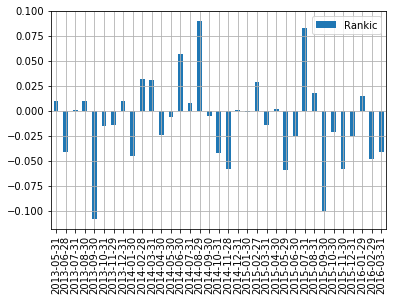

RankIC num: 35
RankIC positive num: 5
RankIC negative num: 10
RankIC non-salient num: 20


In [17]:
RankICs = np.array(RankICs)
show_valid_data = pd.DataFrame(RankICs, index=date_set[:-2], columns=['Rankic'])
ax = show_valid_data.plot(kind='bar')
ax.grid(True)
plt.show()


RankICs_pos = RankICs[RankICs>0.03]
RankICs_neg = RankICs[RankICs<-0.03]
# RankICs_pos = 
print u"RankIC num:", len(RankICs) if type(RankICs)==np.ndarray else 1
print u"RankIC positive num:", len(RankICs_pos) if type(RankICs_pos)==np.ndarray else RankICs_pos
print u"RankIC negative num:", len(RankICs_neg) if type(RankICs_neg)==np.ndarray else RankICs_neg
print u"RankIC non-salient num:", len(RankICs) - len(RankICs_pos) - len(RankICs_neg)

In [7]:
date_set = []
# item = data_mon_group[1]
# for mon_itm in item[1:]:
#     date_set.append(mon_itm.iloc[-1].name[:10])
# print date_set
with open('/Users/bowen/workspace/Quant/algorithmTrading/proj_1-SmartMoney/stock_date', 'rb') as f:
#     pickle.dump(date_set, f, pickle.HIGHEST_PROTOCOL)
    date_set = pickle.load(f)
print len(date_set)

37


In [14]:
stock_code = 'SH600050'
feat_path = r'/Volumes/Seagate Backup Plus Drive/workspace/1m data/1/Q_and_Profits'
with open(os.path.join(feat_path, stock_code), "rb") as f:
    stock_iter_Q = pickle.load(f)
    stock_iter_profits = pickle.load(f)
    stock_iter_group_data = pickle.load(f)
    print "stock_iter_Q.len:", len(stock_iter_Q)
    print "stock_iter_profits.len:", len(stock_iter_profits)
# print "stock_iter_group_data.len:", len(stock_iter_group_data)
print stock_iter_Q[35]
print stock_iter_profits[35]

stock_iter_Q.len: 38
stock_iter_profits.len: 37
0.998110703158
-0.00248756218905


In [42]:
for ids, item in enumerate(stock_iter_group_data):
    print "No.", ids, "item:", item.head(1)

No. 0 item:                      open  high   low  close  preClose  preClose2     amount  \
date                                                                           
2013-04-15 09:31:00  3.48  3.49  3.47   3.48      3.49       3.49  3183651.0   

                         vwap  
date                           
2013-04-15 09:31:00  3.481192  
No. 1 item:                      open  high  low  close  preClose  preClose2     amount  \
date                                                                          
2013-05-20 09:31:00  3.71  3.72  3.7   3.71      3.71       3.71  2786035.0   

                         vwap  
date                           
2013-05-20 09:31:00  3.710656  
No. 2 item:                      open  high   low  close  preClose  preClose2     amount  \
date                                                                           
2013-06-17 09:31:00  3.57  3.58  3.55   3.56      3.57       3.57  2819489.0   

                        vwap  
date                 

No. 30 item:                      open  high  low  close  preClose  preClose2      amount  \
date                                                                           
2015-10-19 09:31:00  6.81  6.91  6.8   6.88      6.83       6.83  25917320.0   

                         vwap  
date                           
2015-10-19 09:31:00  6.850375  
No. 31 item:                      open  high   low  close  preClose  preClose2      amount  \
date                                                                            
2015-11-17 09:31:00  6.75  6.76  6.74   6.75      6.71       6.71  16873476.0   

                         vwap  
date                           
2015-11-17 09:31:00  6.751608  
No. 32 item:                      open  high   low  close  preClose  preClose2     amount  \
date                                                                           
2015-12-18 09:31:00   6.3  6.31  6.28   6.29      6.31       6.31  8092679.0   

                         vwap  
date       

In [29]:
u"""分组表现与多空对冲净值"""
group_num = 5
print "group num:", group_num
print "AstockQ_tmp.shape:", AstockQ_tmp.shape
print "Astock_Q_ids.shape:", Astock_Q_ids.shape
# Astock_Q_ids = np.argsort(AstockQ_tmp, axis=0)

group_profit = []
for group_item in xrange(group_num):
    begin_ids = int(group_item * (Astock_Q_ids.shape[0] * 1.0/group_num))
    end_ids = int(begin_ids + (Astock_Q_ids.shape[0] * 1.0/group_num))
    profit_group_item = np.array([])
    for mon_item in xrange(Astock_Q_ids.shape[1]):
        if profit_group_item.size == 0:
            profit_group_item = Astock_profits_tmp[Astock_Q_ids[begin_ids:end_ids, mon_item]]
        else:
            profit_group_item = np.hstack((profit_group_item
                                           , Astock_profits_tmp[Astock_Q_ids[begin_ids:end_ids,mon_item]]))
    group_profit.append(profit_group_item)
    print group_profit[group_item].shape

group num: 5
AstockQ_tmp.shape: (760, 37)
Astock_Q_ids.shape: (760, 37)
(152, 1369)
(152, 1369)
(152, 1369)
(152, 1369)
(152, 1369)


In [26]:
print Astock_profits_tmp.shape
print Astock_Q_ids.shape
print Astock_profits_tmp[[0,1]].shape

(760, 37)
(760, 37)
(2, 37)
